In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [78]:

crop = pd.read_csv("../data/Crop_recommendation.csv")

In [79]:
ncrop = crop
ncrop = ncrop.drop(columns='label')

In [80]:
crop_dict = {
            'rice':1,
            'maize':2,
            'chickpea':3,
            'kidneybeans':4,
            'pigeonpeas':5,
            'mothbeans':6,
            'mungbean':7,
            'blackgram':8,
            'lentil':9,
            'pomegranate':10,
            'banana':11,
            'mango':12,
            'grapes':13,
            'watermelon':14,
            'muskmelon':15,
            'apple':16,
            'orange':17,
            'papaya':18,
            'coconut':19,
            'cotton':20,
            'jute':21,
            'coffee':22
            }

crop['label'] = crop['label'].map(crop_dict)


In [81]:

X = crop.drop('label', axis = 1)
y = crop['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [82]:
#Normalization: we are normalizing the data between (0,1)
mx = MinMaxScaler()
mx.fit(X_train)
X_train = mx.transform(X_train)
X_test = mx.transform(X_test)

In [83]:

#Standardization: we are converting the mean: 0 and standard deviation: 1 of the given data.
sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [84]:
#Training Model
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)

print(accuracy_score(y_test,y_pred))


0.9931818181818182


In [85]:
dict_crop = {
            1:'rice',
            2:'maize',
            3:'chickpea',
            4:'kidneybeans',
            5:'pigeonpeas',
            6:'mothbeans',
            7:'mungbean',
            8:'blackgram',
            9:'lentil',
            10:'pomegranate',
            11:'banana',
            12:'mango',
            13:'grapes',
            14:'watermelon',
            15:'muskmelon',
            16:'apple',
            17:'orange',
            18:'papaya',
            19:'coconut',
            20:'cotton',
            21:'jute',
            22:'coffee'
            }

def recommendation(N,P,K,temperature,humidity,ph,rainfall):
  features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
  mx_features = mx.transform(features)
  sc_mx_features = sc.transform(mx_features)
  prediction = randclf.predict(sc_mx_features)
  return f'{(dict_crop[prediction[0]]).capitalize()}'

In [86]:
# Test Data -> 94,53,40,20.27774362,82.89408619,5.718627177999999,241.9741949
# Result should be -> Rice
recommendation(94, 53, 40, 20.27, 82.89, 5.71, 241.97)

C:\Users\Aditya\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


'Rice'

In [87]:
# Importing Machine Learning Models from Scikit Learn
from sklearn.ensemble import RandomForestClassifier     # Random Forest Classifier
from xgboost import XGBClassifier                       # Gradient Boosting
from sklearn.svm import SVC                             # Support Vector Machine (SVM)
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.neural_network import MLPClassifier        # Neural Network
from sklearn.tree import DecisionTreeClassifier         # Decision Tree
from sklearn.neighbors import KNeighborsClassifier      # KNN

rf = RandomForestClassifier()
svm = SVC(kernel= 'rbf')
lr = LogisticRegression()
nn = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter = 1000)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [88]:
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)
nn.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [89]:
Y_prediction1 = rf.predict(X_test)
Y_prediction3 = svm.predict(X_test)
Y_prediction4 = lr.predict(X_test)
Y_prediction5 = nn.predict(X_test)
Y_prediction6 = dt.predict(X_test)
knnPred = knn.predict(X_test)

In [90]:
print("RF:",accuracy_score(Y_prediction1, y_test) * 100) # Random Forest
print("SVM:",accuracy_score(Y_prediction3, y_test) * 100) # Support Vector Machine
print("LR:",accuracy_score(Y_prediction4, y_test) * 100) # Logistic Regression
print("NN:",accuracy_score(Y_prediction5, y_test) * 100) # Neural Network
print("DT:",accuracy_score(Y_prediction6, y_test) * 100) # Decision Tree
print("KNN:",accuracy_score(knnPred, y_test) * 100) # Decision Tree

RF: 99.31818181818181
SVM: 96.81818181818181
LR: 96.36363636363636
NN: 97.27272727272728
DT: 98.4090909090909
KNN: 96.5909090909091


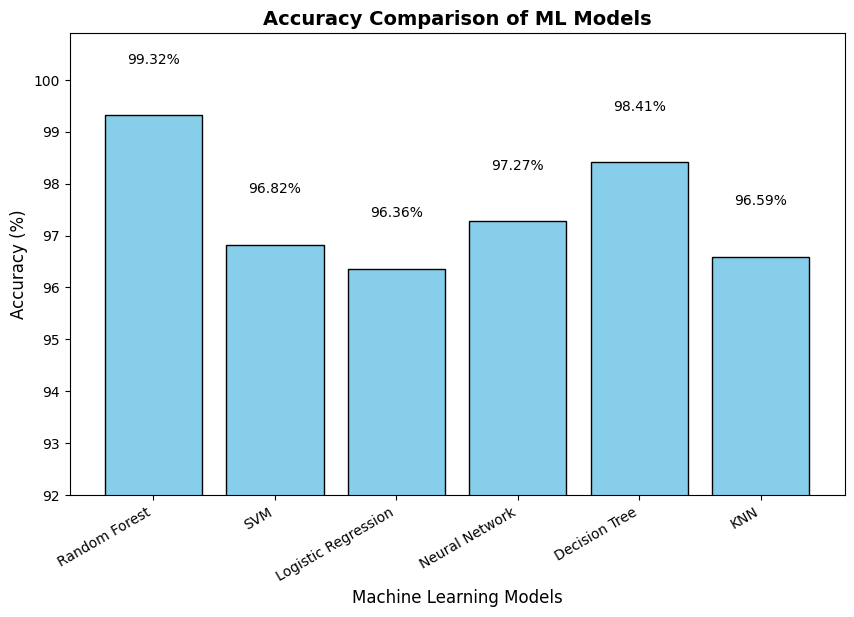

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate accuracy scores
rf_acc = accuracy_score(Y_prediction1, y_test) * 100  # Random Forest
svm_acc = accuracy_score(Y_prediction3, y_test) * 100  # SVM
lr_acc = accuracy_score(Y_prediction4, y_test) * 100  # Logistic Regression
nn_acc = accuracy_score(Y_prediction5, y_test) * 100  # Neural Network
dt_acc = accuracy_score(Y_prediction6, y_test) * 100  # Decision Tree
knn_acc = accuracy_score(knnPred, y_test) * 100       # KNN

# Model names and their scores
models = ["Random Forest", "SVM", "Logistic Regression", "Neural Network", "Decision Tree", "KNN"]
scores = [rf_acc, svm_acc, lr_acc, nn_acc, dt_acc, knn_acc]

# Plotting
plt.figure(figsize=(10,6))
plt.bar(models, scores, color='skyblue', edgecolor='black')
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Accuracy Comparison of ML Models", fontsize=14, fontweight='bold')
plt.xticks(rotation=30, ha="right")
plt.ylim(92, 100.9)

# Adding values on top of bars
for i, score in enumerate(scores):
    plt.text(i, score + 1, f"{score:.2f}%", ha='center', fontsize=10)

plt.show()
